# Finding the Best Two Markets to Advertise In

The goal of this project is to find out the two best markets for an e-learning company that offers programming courses and specializes in web and mobile development to advertise their courses in. Although the company specializes in web development, they also offer courses in many other domains, such as data science and game development.

### Understading the Data

To minimize costs, one should begin by exploring existing data sets before investing in a new survey.

To begin, one should search existing data that may be relevant to one's purpose. __[freeCodeCamp](https://www.freecodecamp.org/)__ is a free e-learning platform that offers courses on web development and has data set __[freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)__ that may be useful. Because freeCodeCamp is a __[popular Medium publication](https://www.freecodecamp.org/news/)__ (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of this analysis.

The survey data is publicly available in this __[GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)__.

Below is a preliminary exploration into the data. The data will be read using a direct link __[here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv)__.

In [1]:
# Read in the data
import pandas as pd
fcc_url = "https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv"
fcc = pd.read_csv(fcc_url, low_memory = 0) # low_memory = False to silence dtypes warning

In [2]:
# Exploring the data
print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Sample Representativity

We want to answer questions about a *population* of new coders that are interesed in the subjects the company offers. We'd like to know:

* Where are these new coders located?
* What are the locations with the greates number of new coders?
* How much money new coders are willing to spend on learning?

Before one can dive into the questions above, they need to decide if the data is representative of the population of interest and if it has the right categories of people. The `JobRoleInterest` column describes what role(s) a participant would be interested in working in, i.e. they are interested in learning about that domain.

In [3]:
# Frequency distribution table for 'JobRoleInterest'
fcc['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                                              1.67

From the information above, one can see that:

* A lot of people are interested in web development (full-stack, front-end, and back-end web development are all within the top 4).
* A few people are interested in mobile development (This is the 5th most popular interest).
* A few people are interested in domains other than web and mobile development.

Note also that many respondents are interested in more than one subject.

In the next code block:

* Split each string in the `JobRoleInterest` column to find the number of options for each participant.
    * Start by dropping null values
* Generate a frequency table for the variable describing the number of options

In [4]:
# Split each string in the 'JobRoleInterest' column
interests_no_null = fcc['JobRoleInterest'].dropna()
split_interests = interests_no_null.str.split(',')

# Frequency table for number of options
n_options = split_interests.apply(lambda x: len(x)) # x is a list of job options
n_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the participants are limited to one programming specialty, while the majority have multiple interests.

Given that the e-learning company offers courses on a variety of subjects, the fact that coders have mixed interests does not deminish the relevancy of the data from freeCodeCamp.

The company's specialty is on web and mobile development, so the code below identifies how many programmers chose at least one of these two options.

In [5]:
# Frequency of web and mobile development
web_or_mobile = interests_no_null.str.contains('Web Developer|Mobile Developer') # returns an array of booleans
web_or_mobile_freq_table = web_or_mobile.value_counts(normalize=True) * 100
web_or_mobile_freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

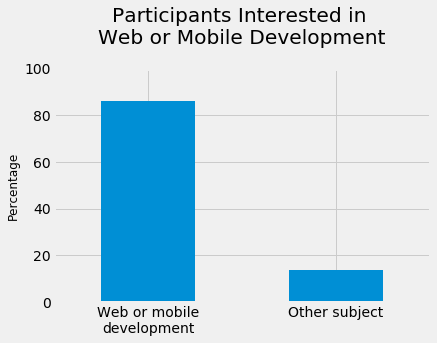

In [6]:
# Graph for percent of participants interested in web or mobile development
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

web_or_mobile_freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development',
          y=1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['Web or mobile\ndevelopment', 'Other subject'],
          rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

More than 86% of participants are interested in either web or mobile deveopment. This suggests that this is a representative population of the company to use.

Now, one needs to figure out what are the best markets in which to advertise courses. We's like to know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money are new coders willing to spend on learning?

### New Coders - Locations and Densities

Begin by finding where new coders are located and what are the densities (how many new coders there are) for each location.

The data set provides information about the location of each participant at the country level. The `CountryLive` variable describes what country each participant lives in.

One can frame the goal as finding the two best countries to advertise in. One indicator of a good market is the number of potential customers. 

In [7]:
# Drop all rows where participants didn't answer what role they are interested in
clean_fcc = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency table for the CountryLive variable 
absolute_freq_countrylive = clean_fcc['CountryLive'].value_counts()
relative_freq_countrylive = clean_fcc['CountryLive'].value_counts(normalize=True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_freq_countrylive,
                     'Percentage': relative_freq_countrylive}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Somalia,1,0.014624
Trinidad & Tobago,1,0.014624
Papua New Guinea,1,0.014624
Nambia,1,0.014624


Nearly 46% of potential customers are located in the US. India has the second highest customer density (7.7%), but it's less than 10% of the total participants and not much higher than the United Kingdome(4.6%) or Canada(3.8%).

The next relevant question is how much money people are willing to spend on learning. Advertising in high density markets where most people are only willing to learn for free is extremely unlikely to be profitable for the company.

### Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey.

The company sells subscriptions at a price of \$59 per month, so they are particularly interested in how much money each student spends *per month*.

It's wise to narrow down the analysis to only the top four counties: the US, India, the UK, and Canada. Two reasons for this descision are:

* These are the countries having the highest absolute frequencies in the sample, which means there is sufficient data for each.
* The courses are written in English, and English is an official language in all of these countries. The more people that know English, the better the chances to target the right people with the ads.

Below we create a new column that describes the amount of money a student has spend per month (at the moment they competed the survey).

In [8]:
# Create a new column for money spent per month

# Remove the rows with null values in 'CountryLive'
clean_fcc = clean_fcc[clean_fcc['CountryLive'].notnull()]

# Replace 0 with 1 to avoid division by 0
    # Some students answered that they had been learning to code for 0 months
    # To avoid dividing by 0, replace all the values of 0 with 1
print(clean_fcc['MonthsProgramming'].value_counts().sort_index().head(2))
clean_fcc['MonthsProgramming'].replace(0, 1, inplace=True)
print('\n')
print(clean_fcc['MonthsProgramming'].value_counts().sort_index().head(2))
print('\n')


# New column for the amount of money each student spends each month
clean_fcc['money_per_month'] = clean_fcc['MoneyForLearning'] / clean_fcc['MonthsProgramming']
print('Null money_per_month values: {}'.format(clean_fcc['money_per_month'].isnull().sum()))

0.0    228
1.0    757
Name: MonthsProgramming, dtype: int64


1.0    985
2.0    659
Name: MonthsProgramming, dtype: int64


Null money_per_month values: 626


In [9]:
# Keep only the rows with non-null values in the 'money_per_month' column
clean_fcc = clean_fcc[clean_fcc['money_per_month'].notnull()]

# Frequency table to check if there is still enough data
clean_fcc['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [10]:
# Group the remaining data by 'CountryLive' and find the average USD spent per month in each of the top 4 country
countries_mean = clean_fcc.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the UK and Canada are a bit surprising relative to the value seen for India. Consider a few socio-economical metrics (like GDP per capita), one would intuitively expect people in the UK and Canada to spend more on learning than people in India.

One explanation may be that there is not enough data for the UK and Canada or they may be some outliers (maybe coming from wrong survey answers) making the mean too large for India or too low for the UK and Canada. Or it might be that the results are correct.

### Dealing with Extreme Outliers

Below are four box plots, one for each country, that show the distribution of the `money_per_month` variable. All extreme outliers are identified and dismissed.

Mean values for each of the four countries is recomputed.

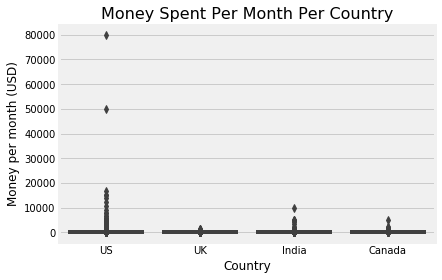

In [11]:
# Isolate only the countries of interest
top_fcc = clean_fcc[clean_fcc['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = top_fcc)
plt.title('Money Spent Per Month Per Country', fontsize=16)
plt.ylabel('Money per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data from the United Kingdom, India, or Canada, but one can immediately identify two exteme outliers in the US data. Two people spend \$20,000 or more per month on learning. This is not impossible, but it seems very unlikely, so they should both be removed.

In [12]:
# Isolate only those participants who spend less than $20,000 per month
clean_fcc = clean_fcc[clean_fcc['money_per_month'] < 20000]

In [13]:
# Compute the mean values and plot the box plots again

countries_mean = clean_fcc.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

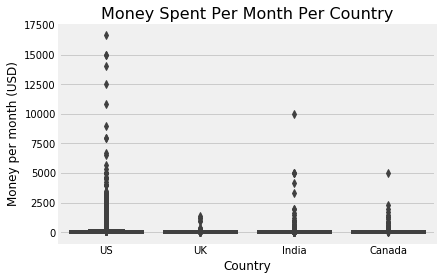

In [14]:
# Isolate the countries of interest
top_fcc = clean_fcc[clean_fcc['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = top_fcc)
plt.title('Money Spent Per Month Per Country', fontsize=16)
plt.ylabel('Money per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

One can see a few extreme outliers for India (values over \$2,500 per month), but it's unclear whether this is good data or not. Before eliminated these data points, examine these data points to find any relevant information.

In [15]:
# Inspect the extreme outlier for India
india_outliers = top_fcc[
    (top_fcc['CountryLive'] == 'India') &
    (top_fcc['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that no participant attended a bootcamp. Overall, it's difficult to figure out from the data whether these persons really spent that much money on learning. The actual question of the survey was, "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these few rows.

In [16]:
# Remove the outliers for India
top_fcc = top_fcc.drop(india_outliers.index) # use the row labels

In [17]:
# Inspect US outliers
us_outliers = top_fcc[
    (top_fcc['CountryLive'] == 'United States of America') &
    (top_fcc['money_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Of the 11 estreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five people, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, those five rows should be removed.

The data also shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). Therefore, these eight outliers should be removed.

In the next code block, we'll remove respondents that:

* Didn't attend bootcamps.
* Had been programming for three months or less when they completed the survey.

In [18]:
# Remove those who didn't attend bootcamp
no_bootcamp = top_fcc[
    (top_fcc['CountryLive'] == 'United States of America') &
    (top_fcc['money_per_month'] >= 6000) &
    (top_fcc['AttendedBootcamp'] == 0)]

top_fcc = top_fcc.drop(no_bootcamp.index)

# Remove those who had been programming for less than 3 months
less_than_3_months = top_fcc[
    (top_fcc['CountryLive'] == 'United States of America') & 
    (top_fcc['money_per_month'] >= 6000) &
    (top_fcc['MonthsProgramming'] <= 3)]

top_fcc = top_fcc.drop(less_than_3_months.index)

In [19]:
# Inspect outliers for Canada
canada_outliers = top_fcc[
    (top_fcc['CountryLive'] == 'Canada') &
    (top_fcc['money_per_month'] >= 4000)]

print(canada_outliers['MonthsProgramming'])
canada_outliers

13659    2.0
Name: MonthsProgramming, dtype: float64


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here is a similar situation to the one above. This participant had been coding for no more than two months and has attended a bootcamp. Again, this participant should be removed.

In [20]:
top_fcc = top_fcc.drop(canada_outliers.index)

In [21]:
# Recompute the mean of money spent by students each month
top_fcc.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

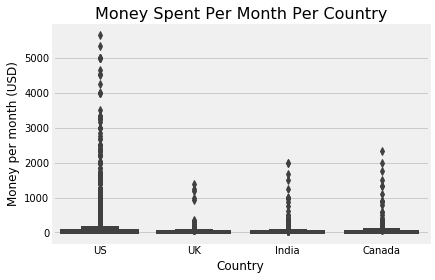

In [22]:
# Visualize the distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = top_fcc)
plt.title('Money Spent Per Month Per Country', fontsize=16)
plt.ylabel('Money per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

### Choosing the Two Best Markets

The US is an obvious choice for advertising investments since there are a lot of potential students who are willing to pay a monthly subscription that costs \$59.

The data strongly suggests that we should not spend money advertising in the UK since the average student would be unwilling to pay the subscription costs.

Canada may seems like the second best market since they are willing to pay roughly \$93 per month, compared to India (\$66); however, Canada has a smaller customer base, almost half that in India.

In [23]:
# Frequency table for the 'CountryLive' column
top_fcc['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It's not obvious which country to choose between India and Canada. Although it seems more tempting to choose Canada, there is a good chance that India might actually be a better choice because of the large number of potential customers.

At this point, it seems one has several options:

1. Advertise in the US, India, and Canada by splitting the advertising budget in various combinations:
    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada; etc.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    * 70% for the US, 30% for India
    * 65% for the US, 35% for Canada; etc.
3. Advertise only in the US.

At this point, it's probably best to senf the analysis to a marketing team.

### Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion reached was that the US would be a good markey to advertise in.

The second best market wasn't clear-cut and was between India and Canada. The results should be sent to a marketing team for further analysis.

The next steps for this project include:

* Finding other criteria for choosing the best market.
* Analyzing other data sets:
    * __[freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey)__
    * __[StackOverflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey)__
* Improving the style of the project by following guidelines discussed in __[this style guide](https://www.dataquest.io/blog/data-science-project-style-guide)__.